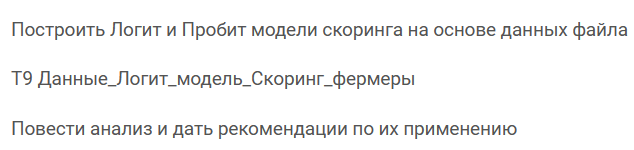

**Цель:** выяснить, от каких параметров зависит наличие кредитного риска у компании

In [147]:
import statsmodels.api as sm
import scipy.stats as sts
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings("ignore")

# Импорт данных

In [148]:
df = pd.read_excel('Т9 Данные_Логит_модель_Скоринг_фермеры.xlsx', sheet_name='Sheet1', decimal=',').iloc[:,1:]
df.head()

,Регистрационный номер,Статус,Регион регистрации,Код ОКАТО,Вид деятельности/отрасль,ИДО,ИФР,Сводный индикатор,"Уставный капитал, RUB","2017, Основные средства , RUB",...,"2017, Коэффициент быстрой ликвидности, %","2018, Коэффициент быстрой ликвидности, %","2019, Коэффициент быстрой ликвидности, %","2020, Коэффициент быстрой ликвидности, %","2017, Коэффициент абсолютной ликвидности, %","2018, Коэффициент абсолютной ликвидности, %","2019, Коэффициент абсолютной ликвидности, %","2020, Коэффициент абсолютной ликвидности, %",Округ,Отрасль
0,1020200883010,1,Башкортостан (Республика),80245835001,Смешанное сельское хозяйство,62.0,9.0,Высокий риск,2193918.0,40395000.0,...,2.5802,0.9077,2.8087,3.0846,0.0116,0.0041,1.0650,1.3824,Южный ФО,Растениеводство
1,1020201300448,1,Башкортостан (Республика),80252810001,Смешанное сельское хозяйство,41.0,94.0,Высокий риск,15790.0,101578000.0,...,0.0581,0.0818,0.0155,0.0734,NaN,0.0026,NaN,NaN,Южный ФО,Растениеводство
2,1020201844596,1,Башкортостан (Республика),80241830001,Выращивание зерновых культур,2.0,97.0,Высокий риск,74860000.0,744302000.0,...,0.0399,0.0551,0.0407,0.0236,0.0036,0.0085,0.0131,0.0038,Южный ФО,Растениеводство
3,1020800566819,1,Калмыкия (Республика),85215811001,"Разведение молочного крупного рогатого скота, производство сырого молока",30.0,22.0,Высокий риск,14866.0,26524000.0,...,1.5895,1.8070,1.4888,1.8220,0.0001,0.0020,0.0131,0.0002,Южный ФО,Растениеводство
4,1020800597740,1,Калмыкия (Республика),85220855001,Выращивание зерновых культур,15.0,99.0,Высокий риск,12864000.0,25758000.0,...,0.0145,0.0359,0.0319,0.0237,NaN,NaN,NaN,NaN,Южный ФО,Растениеводство


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8673 entries, 0 to 8672
Columns: 207 entries, Регистрационный номер to Отрасль
dtypes: float64(199), int64(3), object(5)
memory usage: 13.7+ MB


# Отбор регрессоров

### 1. Отобрать 11 самых важных регрессоров

Для начала удалю данные за 2017-2019гг

In [150]:
for col in df.columns:
    if '201' in col:
        del df[col]

In [151]:
df.head()

,Регистрационный номер,Статус,Регион регистрации,Код ОКАТО,Вид деятельности/отрасль,ИДО,ИФР,Сводный индикатор,"Уставный капитал, RUB","2020, Основные средства , RUB",...,"2020, Доля себестоимости как процент от выручки, %","2020, Рентабельность прибыли до налогообложения и процентов - (EBITM), %","2020, Рентабельность активов (ROA), %","2020, Рентабельность капитала (ROE), %","2020, Рентабельность активов (п. 1.6 ст.105.8 НК РФ), %","2020, Коэффициент текущей ликвидности, %","2020, Коэффициент быстрой ликвидности, %","2020, Коэффициент абсолютной ликвидности, %",Округ,Отрасль
0,1020200883010,1,Башкортостан (Республика),80245835001,Смешанное сельское хозяйство,62.0,9.0,Высокий риск,2193918.0,33176000.0,...,0.8499,0.0055,0.0022,0.0025,0.0084,8.3821,3.0846,1.3824,Южный ФО,Растениеводство
1,1020201300448,1,Башкортостан (Республика),80252810001,Смешанное сельское хозяйство,41.0,94.0,Высокий риск,15790.0,52664000.0,...,1.1418,-0.1418,-0.0194,-0.1858,-0.0203,0.0734,0.0734,NaN,Южный ФО,Растениеводство
2,1020201844596,1,Башкортостан (Республика),80241830001,Выращивание зерновых культур,2.0,97.0,Высокий риск,74860000.0,NaN,...,2.1103,-1.1015,-0.4308,0.0274,-0.6748,0.0342,0.0236,0.0038,Южный ФО,Растениеводство
3,1020800566819,1,Калмыкия (Республика),85215811001,"Разведение молочного крупного рогатого скота, производство сырого молока",30.0,22.0,Высокий риск,14866.0,24435000.0,...,0.9747,0.3949,0.0681,0.1362,0.0050,3.1668,1.8220,0.0002,Южный ФО,Растениеводство
4,1020800597740,1,Калмыкия (Республика),85220855001,Выращивание зерновых культур,15.0,99.0,Высокий риск,12864000.0,2927000.0,...,1.5579,-27.4664,-3.3598,0.5444,-0.1342,0.0362,0.0237,NaN,Южный ФО,Растениеводство


Сделаю пояснения для регрессоров для дальнейшего отбора

In [152]:
pd.set_option('display.max_colwidth', None)

In [153]:
regr_explain = pd.read_excel('Т9 Данные_Логит_модель_Скоринг_фермеры.xlsx', sheet_name='Пояснение столбцов', decimal=',')
regr_explain

,Регистрационный номер,Unnamed: 1
0,Статус,"0 - нет кредитного риска, 1 - есть кредитный риск"
1,Регион регистрации,NaN
2,Код ОКАТО,"Это идентификатор, который указывает на то, в какой республике, крае, области, округе и районе находится объект. Код ОКАТО присваивали организациям и индивидуальным предпринимателям при регистрации, чтобы понимать, где бизнес платит налоги."
3,Вид деятельности/отрасль,NaN
4,ИДО,"Индекс Должной Осмотрительности представляет собой значение от 1 до 99, где более высокое значение отражает большую вероятность того, что компания создана не для уставных целей, а в качестве ""транзакционной единицы"", не имеющей существенных собственных активов и операций, или является ""брошенным"" активом."
5,ИФР,"Индекс Финансового Риска (ИФР) представляет собой значение от 1 до 99, где более высокое значение указывает на наличие признаков неудовлетворительного финансового состояния, которые могут привести к тому, что компания утратит платежеспособность."
6,Сводный индикатор,"Сводный индикатор риска является совокупной оценкой аналитических показателей, включая Индекс Должной Осмотрительности, Индекс Финансового Риска и Индекс Платежной Дисциплины (см. ниже), а также Статуса компании (состояние ликвидации, банкротства и т.д.). Представляет собой 3 значения риска: низкий, средний и высокий."
7,"2020, Основные средства , RUB","Материальные активы, которые предприятие содержит с целью использования их в процессе производства или поставки товаров, предоставления услуг, сдачи в аренду другим лицам или для осуществления административных и социально-культурных функций, ожидаемый срок полезного использования (эксплуатации) которых более одного года (или операционного цикла, если он длится дольше года)."
8,"2020, Внеоборотные активы, RUB","Это имущественные ресурсы предприятия с длительным сроком обращаемости, используемые в процессе производства или коммерческой деятельности."
9,"2020, Чистые активы, RUB","Это реальная стоимость имущества, имеющегося у общества, ежегодно определяемая за вычетом его долгов, то есть разница между активами и обязательствами компании"


Критерии отбора:
1) Показатели, по которым можно опредить уровень платежеспособности компании.
2) Регрессор нельзя вычислить из других отобранных регрессоров.

In [154]:
#Отобранные регрессоры
regressors = ['Округ','Отрасль','ИДО', 'ИФР', '2020, Оборотные активы, RUB', '2020, Капитал и резервы, RUB',
          '2020, Совокупный долг, RUB', '2020, Выручка, RUB', '2020, Чистая прибыль (убыток), RUB',
          '2020, Оборачиваемость кредиторской задолженности, разы', '2020, Соотношение совокупного долга к EBIT, %']

In [155]:
data_regressors = pd.DataFrame(columns=['Регрессор', 'Пояснение'])
for row in range(regr_explain.shape[0]):
    regr = regr_explain.iloc[row, 0]
    if regr in regressors:
        data_regressors.loc[len(data_regressors)] = [regr,regr_explain.iloc[row,1]]

data_regressors

,Регрессор,Пояснение
0,ИДО,"Индекс Должной Осмотрительности представляет собой значение от 1 до 99, где более высокое значение отражает большую вероятность того, что компания создана не для уставных целей, а в качестве ""транзакционной единицы"", не имеющей существенных собственных активов и операций, или является ""брошенным"" активом."
1,ИФР,"Индекс Финансового Риска (ИФР) представляет собой значение от 1 до 99, где более высокое значение указывает на наличие признаков неудовлетворительного финансового состояния, которые могут привести к тому, что компания утратит платежеспособность."
2,"2020, Оборотные активы, RUB","Активы, которые потребляются в течение одного производственного цикла или списываются в течение года."
3,"2020, Капитал и резервы, RUB","Это пассивная сторона документа, которая отражает собственные средства организации и взятые в займы."
4,"2020, Совокупный долг, RUB","Это сумма краткосрочных и долгосрочных долговых обязательств, по которым начисляются проценты, за исключением непроцентных обязательств, таких как начисленные расходы, кредиторская задолженность и отложенные налоги на прибыль."
5,"2020, Выручка, RUB","Это поступление (в виде денежных средств или будущих выгод) от продажи товаров, работу или услуг. Выручка – самый общий показатель финансовых результатов организации."
6,"2020, Чистая прибыль (убыток), RUB","Это доход бизнеса. Сумма, которая остаётся после вычета всех расходов, налогов и выплат по кредитам."
7,"2020, Оборачиваемость кредиторской задолженности, разы","Это показатель скорости погашения организацией своей задолженности перед поставщиками и подрядчиками.\nДанный коэффициент показывает, сколько раз (обычно, за год) фирма погасила среднюю величину своей кредиторской задолженности."
8,"2020, Соотношение совокупного долга к EBIT, %","Коэффициент, используемый в финансовом анализе для определения уровня долговой нагрузки компании. Показатель представляет собой отношение совокупного долга и прибыли до уплаты процентов по кредитам, налога на прибыль, учета износа и начисленной амортизации (EBITDA)."
9,Отрасль,NaN


In [156]:
new_df = df[regressors]
new_df.head()

,Округ,Отрасль,ИДО,ИФР,"2020, Оборотные активы, RUB","2020, Капитал и резервы, RUB","2020, Совокупный долг, RUB","2020, Выручка, RUB","2020, Чистая прибыль (убыток), RUB","2020, Оборачиваемость кредиторской задолженности, разы","2020, Соотношение совокупного долга к EBIT, %"
0,Южный ФО,Растениеводство,62.0,9.0,100015000.0,1.183340e+08,1.485700e+07,57500000.0,297000.0,4.6,9.2563
1,Южный ФО,Растениеводство,41.0,94.0,3727000.0,5.589000e+06,5.080200e+07,8076000.0,-1145000.0,0.2,NaN
2,Южный ФО,Растениеводство,2.0,97.0,39874000.0,-1.127406e+09,1.167280e+09,21490000.0,-30440000.0,NaN,NaN
3,Южный ФО,Растениеводство,30.0,22.0,16382000.0,2.172400e+07,1.909300e+07,8053000.0,2790000.0,1.3,4.3774
4,Южный ФО,Растениеводство,15.0,99.0,1342000.0,-3.429500e+07,3.856400e+07,1027000.0,-14815000.0,0.1,-18.7363


In [157]:
new_df['Статус'] = df['Статус']
new_df.head()

,Округ,Отрасль,ИДО,ИФР,"2020, Оборотные активы, RUB","2020, Капитал и резервы, RUB","2020, Совокупный долг, RUB","2020, Выручка, RUB","2020, Чистая прибыль (убыток), RUB","2020, Оборачиваемость кредиторской задолженности, разы","2020, Соотношение совокупного долга к EBIT, %",Статус
0,Южный ФО,Растениеводство,62.0,9.0,100015000.0,1.183340e+08,1.485700e+07,57500000.0,297000.0,4.6,9.2563,1
1,Южный ФО,Растениеводство,41.0,94.0,3727000.0,5.589000e+06,5.080200e+07,8076000.0,-1145000.0,0.2,NaN,1
2,Южный ФО,Растениеводство,2.0,97.0,39874000.0,-1.127406e+09,1.167280e+09,21490000.0,-30440000.0,NaN,NaN,1
3,Южный ФО,Растениеводство,30.0,22.0,16382000.0,2.172400e+07,1.909300e+07,8053000.0,2790000.0,1.3,4.3774,1
4,Южный ФО,Растениеводство,15.0,99.0,1342000.0,-3.429500e+07,3.856400e+07,1027000.0,-14815000.0,0.1,-18.7363,1


Удалю строки с пропущенными значениями, т.к. данных в датасете предостаточно, а также замена пустых ячеек на какие либо значения, отличающиеся от действительных, может привести к потери точности проноза для конкретной компании.

In [158]:
new_df = new_df.dropna()
new_df

,Округ,Отрасль,ИДО,ИФР,"2020, Оборотные активы, RUB","2020, Капитал и резервы, RUB","2020, Совокупный долг, RUB","2020, Выручка, RUB","2020, Чистая прибыль (убыток), RUB","2020, Оборачиваемость кредиторской задолженности, разы","2020, Соотношение совокупного долга к EBIT, %",Статус
0,Южный ФО,Растениеводство,62.0,9.0,100015000.0,118334000.0,14857000.0,57500000.0,297000.0,4.6,9.2563,1
3,Южный ФО,Растениеводство,30.0,22.0,16382000.0,21724000.0,19093000.0,8053000.0,2790000.0,1.3,4.3774,1
4,Южный ФО,Растениеводство,15.0,99.0,1342000.0,-34295000.0,38564000.0,1027000.0,-14815000.0,0.1,-18.7363,1
5,Южный ФО,Растениеводство,8.0,95.0,8471000.0,-2042000.0,18373000.0,2646000.0,-3599000.0,0.9,-1.7180,1
10,Приволжский ФО,Растениеводство,66.0,86.0,32000.0,6072000.0,5593000.0,5470000.0,-19000.0,1.1,0.5300,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8667,Центральный ФО,Растениеводство,4.0,8.0,28599000.0,30551000.0,6310000.0,28888000.0,9567000.0,3.5,0.0101,0
8669,Центральный ФО,Растениеводство,6.0,13.0,35354000.0,39925000.0,12305000.0,31231000.0,9675000.0,5.4,17.1053,0
8670,Центральный ФО,Растениеводство,14.0,5.0,56092000.0,60012000.0,5338000.0,87220000.0,9437000.0,22.2,0.1174,0
8671,Приволжский ФО,Растениеводство,2.0,5.0,639810000.0,303327000.0,534631000.0,238395000.0,107869000.0,15.8,4.5884,0


Переведу строковые данные в числовые

In [159]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labels_otrasl = labelencoder.fit_transform(new_df['Отрасль'])
labels_okrug = labelencoder.fit_transform(new_df['Округ'])

In [160]:
new_df['Отрасль'] = labels_otrasl
new_df['Округ'] = labels_okrug
new_df

,Округ,Отрасль,ИДО,ИФР,"2020, Оборотные активы, RUB","2020, Капитал и резервы, RUB","2020, Совокупный долг, RUB","2020, Выручка, RUB","2020, Чистая прибыль (убыток), RUB","2020, Оборачиваемость кредиторской задолженности, разы","2020, Соотношение совокупного долга к EBIT, %",Статус
0,5,1,62.0,9.0,100015000.0,118334000.0,14857000.0,57500000.0,297000.0,4.6,9.2563,1
3,5,1,30.0,22.0,16382000.0,21724000.0,19093000.0,8053000.0,2790000.0,1.3,4.3774,1
4,5,1,15.0,99.0,1342000.0,-34295000.0,38564000.0,1027000.0,-14815000.0,0.1,-18.7363,1
5,5,1,8.0,95.0,8471000.0,-2042000.0,18373000.0,2646000.0,-3599000.0,0.9,-1.7180,1
10,0,1,66.0,86.0,32000.0,6072000.0,5593000.0,5470000.0,-19000.0,1.1,0.5300,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8667,4,1,4.0,8.0,28599000.0,30551000.0,6310000.0,28888000.0,9567000.0,3.5,0.0101,0
8669,4,1,6.0,13.0,35354000.0,39925000.0,12305000.0,31231000.0,9675000.0,5.4,17.1053,0
8670,4,1,14.0,5.0,56092000.0,60012000.0,5338000.0,87220000.0,9437000.0,22.2,0.1174,0
8671,0,1,2.0,5.0,639810000.0,303327000.0,534631000.0,238395000.0,107869000.0,15.8,4.5884,0


### 2. Проверка на наличие мультиколлинеарности
Тест Фаррара-Глоубера

In [161]:
cols = new_df.columns.tolist()
cols = [cols[-1]] + cols[0:-1]
new_df = new_df[cols]
new_df.head()

,Статус,Округ,Отрасль,ИДО,ИФР,"2020, Оборотные активы, RUB","2020, Капитал и резервы, RUB","2020, Совокупный долг, RUB","2020, Выручка, RUB","2020, Чистая прибыль (убыток), RUB","2020, Оборачиваемость кредиторской задолженности, разы","2020, Соотношение совокупного долга к EBIT, %"
0,1,5,1,62.0,9.0,100015000.0,118334000.0,14857000.0,57500000.0,297000.0,4.6,9.2563
3,1,5,1,30.0,22.0,16382000.0,21724000.0,19093000.0,8053000.0,2790000.0,1.3,4.3774
4,1,5,1,15.0,99.0,1342000.0,-34295000.0,38564000.0,1027000.0,-14815000.0,0.1,-18.7363
5,1,5,1,8.0,95.0,8471000.0,-2042000.0,18373000.0,2646000.0,-3599000.0,0.9,-1.7180
10,1,0,1,66.0,86.0,32000.0,6072000.0,5593000.0,5470000.0,-19000.0,1.1,0.5300


###### Проверка наличия мультиколлинеарности всего массива переменных

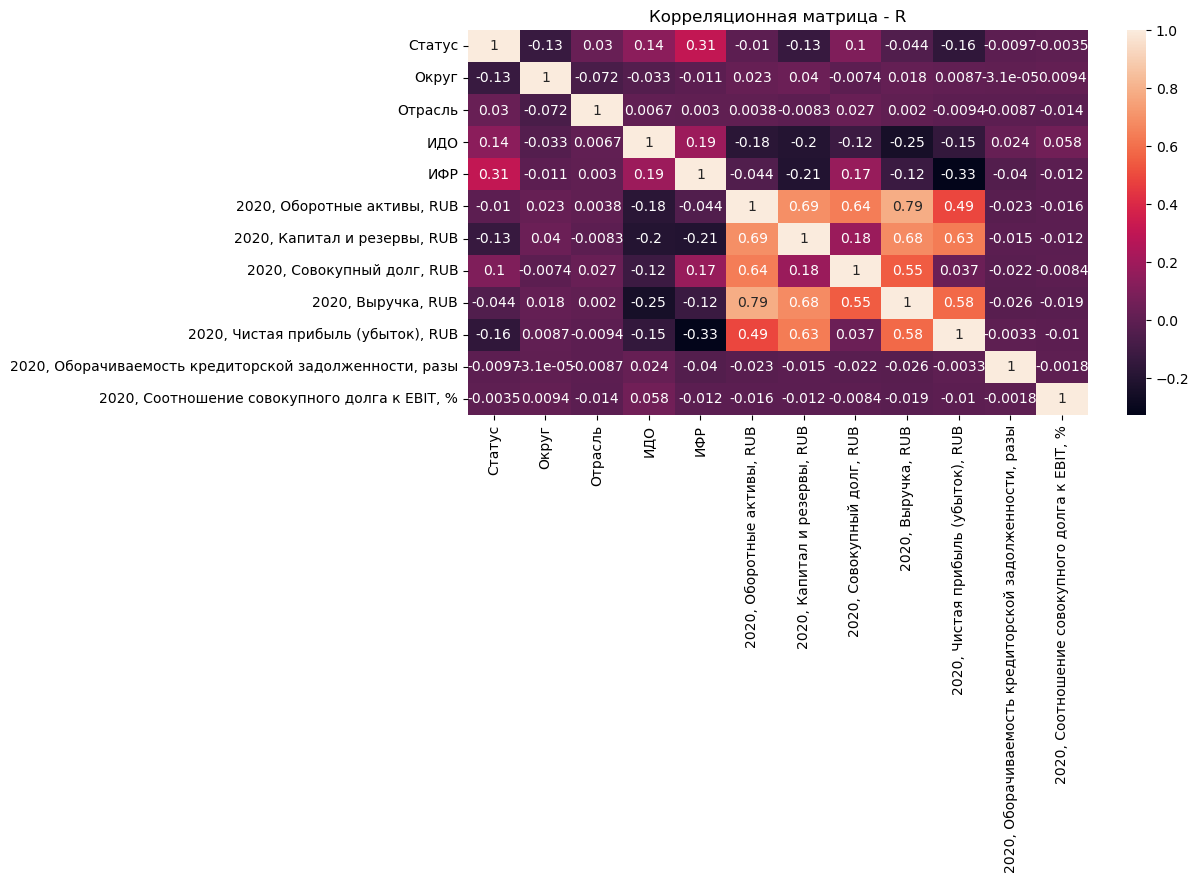

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Корреляционная матрица - R')
sns.heatmap(new_df.corr(), annot = True, fmt='.2g');

H0 - в данных присутствует мультиколлинеарность \
H1 - в данных отсутствует мультиколлинеарность

In [163]:
R = sp.Matrix(new_df.corr())[1:,1:]
det_R = sp.det(R)
det_R

0.0286101670845952

In [164]:
k = len(regressors)
n = new_df.shape[0]
FG_obs = -(n - 1 - 1/6 * (2*k + 5)) * sp.log(det_R)
chi_2 = sts.chi2.isf(0.05, 1/2*k*(k-1))
FG_obs, chi_2

(21890.8206956944, 73.31149302908324)

In [165]:
print('H0 отвергаем') if (chi_2 > FG_obs) else print('H0 не отвергаем')

H0 не отвергаем


Вывод: мультиколлинеарность существует

По матрице корреляции видно, что больше всего со всеми коррелируют "2020 Оборотные активы, RUB" и "2020, Выручка, RUB"

###### Проверка наличия мультиколлинеарности каждой переменной с другими

In [166]:
R_inv = R**(-1)
R_inv

Matrix([
[     1.00848447875051,   0.0714437847620826,   0.0288433637733201, 0.00179585672245366, -0.0275679138151637,  -0.0438348712051949,   0.0318046072032986, 0.00187928692921228,   0.0355485201301466, -0.000431932493798091, -0.0104503056184312],
[   0.0714437847620826,     1.00657044589528, -0.00779040976251879, 0.00895012526286592,   0.019241081174328, -0.00632983362395021,  -0.0457252209555186, 0.00961256553012231,   0.0015469728759613,   0.00891327230724461,  0.0142275226274922],
[   0.0288433637733201, -0.00779040976251878,     1.10801988416408,  -0.197961760149317, -0.0956692387330293,    0.109611852672713,   0.0728517238129056,   0.251653514177231,  -0.0738842461470187,   -0.0276596863508294, -0.0623625012135673],
[  0.00179585672245366,  0.00895012526286592,   -0.197961760149317,     1.2097594054094, -0.0880881636775218,   0.0552402733674128,   -0.229179353308531,  0.0541229429163978,    0.353315589020717,     0.049142134315987,  0.0284099520470493],
[  -0.0275679138151637,

In [167]:
nu_1 = k
nu_2 = (n - k - 1)
F_tabl = round(sts.f.isf(0.05, nu_1, nu_2), 4)
print(f'F tabl = {F_tabl}')
print('---------------')
for j,r in enumerate(regressors):
    c_jj = R_inv[j, j]
    F_j = round((c_jj - 1) * (n - k - 1) / k, 4)
    print(r, F_j, F_j >= F_tabl)

F tabl = 1.7902
---------------
Округ 4.7459 True
Отрасль 3.6753 True
ИДО 60.4224 True
ИФР 117.3318 True
2020, Оборотные активы, RUB 1973.1513 True
2020, Капитал и резервы, RUB 1149.8422 True
2020, Совокупный долг, RUB 960.1745 True
2020, Выручка, RUB 1477.4618 True
2020, Чистая прибыль (убыток), RUB 645.6628 True
2020, Оборачиваемость кредиторской задолженности, разы 1.8686 True
2020, Соотношение совокупного долга к EBIT, % 2.4890 True


Вывод: все регрессоры, кроме "2020, Соотношение совокупного долга к EBIT" имеют тесную связь с другими регрессорами.

Наибольшую связь имеет регрессор - "2020, Оборотные активы, RUB"\
Наименьшую - "2020, Оборачиваемость кредиторской задолженности, разы"

###### Проверка наличия мультиколлинеарности каждой пары переменных

In [168]:
t_tabl = round(sts.t.isf(0.05, n-k-1), 4)
print(f't tabl = {t_tabl}')
print('-----------------')
print('Пары с мультиколлинеарностью')
for i in range(len(regressors)):
    for j in range(i + 1, len(regressors)):
        pair = (regressors[i], regressors[j])
        c_ij = R_inv[i, j]
        c_ii = R_inv[i, i]
        c_jj = R_inv[j, j]
        r_ij = -c_ij / (c_ii * c_jj)**0.5
        t_ij = round((r_ij * (n - k - 1)**0.5) / (1 - r_ij**2)**0.5, 4)
        if abs(t_ij) > t_tabl:
            print(pair, abs(t_ij))

t tabl = 1.6451
-----------------
Пары с мультиколлинеарностью
('Округ', 'Отрасль') 5.5763
('Округ', 'ИДО') 2.1411
('Округ', '2020, Капитал и резервы, RUB') 1.9594
('Округ', '2020, Чистая прибыль (убыток), RUB') 1.8924
('Отрасль', '2020, Совокупный долг, RUB') 2.1699
('ИДО', 'ИФР') 13.6127
('ИДО', '2020, Оборотные активы, RUB') 3.3536
('ИДО', '2020, Капитал и резервы, RUB') 4.6811
('ИДО', '2020, Совокупный долг, RUB') 3.2967
('ИДО', '2020, Выручка, RUB') 9.9055
('ИДО', '2020, Чистая прибыль (убыток), RUB') 3.7555
('ИДО', '2020, Оборачиваемость кредиторской задолженности, разы') 2.0585
('ИДО', '2020, Соотношение совокупного долга к EBIT, %') 4.6450
('ИФР', '2020, Оборотные активы, RUB') 2.9545
('ИФР', '2020, Капитал и резервы, RUB') 2.2546
('ИФР', '2020, Совокупный долг, RUB') 9.9968
('ИФР', '2020, Выручка, RUB') 2.0234
('ИФР', '2020, Чистая прибыль (убыток), RUB') 17.5940
('ИФР', '2020, Оборачиваемость кредиторской задолженности, разы') 3.5023
('ИФР', '2020, Соотношение совокупного дол

Вывод: между многими парами регрессоров существует мультиколлинеарность

Наибольшую связь имеют пары:\
('2020, Оборотные активы, RUB', '2020, Совокупный долг, RUB') 56.0739\
('2020, Оборотные активы, RUB', '2020, Капитал и резервы, RUB') 45.1908

**Вывод: исходя из теста Фаррара-Глоубера, необходимо удалить следующие регрессоры:**
1) '2020, Оборотные активы, RUB', т.к. сильнее всех коррелирует с другими регрессорми, а также он менее значим, чем Совокупный долг и Капитал и резервы в определении платежеспособности компании
2) '2020, Выручка, RUB', т.к. имеет сильную связь со многими регрессорами. Это менее важный показатель для данной задачи, чем Совокупный долг, Капитал и резервы или Чистая прибыль.

In [169]:
new_df.columns

Index(['Статус', 'Округ', 'Отрасль', 'ИДО', 'ИФР',
       '2020, Оборотные активы, RUB', '2020, Капитал и резервы, RUB',
       '2020, Совокупный долг, RUB', '2020, Выручка, RUB',
       '2020, Чистая прибыль (убыток), RUB',
       '2020, Оборачиваемость кредиторской задолженности, разы',
       '2020, Соотношение совокупного долга к EBIT, %'],
      dtype='object')

In [170]:
new_df.drop(['2020, Оборотные активы, RUB', '2020, Выручка, RUB'], axis= 1, inplace= True)

In [171]:
new_df

,Статус,Округ,Отрасль,ИДО,ИФР,"2020, Капитал и резервы, RUB","2020, Совокупный долг, RUB","2020, Чистая прибыль (убыток), RUB","2020, Оборачиваемость кредиторской задолженности, разы","2020, Соотношение совокупного долга к EBIT, %"
0,1,5,1,62.0,9.0,118334000.0,14857000.0,297000.0,4.6,9.2563
3,1,5,1,30.0,22.0,21724000.0,19093000.0,2790000.0,1.3,4.3774
4,1,5,1,15.0,99.0,-34295000.0,38564000.0,-14815000.0,0.1,-18.7363
5,1,5,1,8.0,95.0,-2042000.0,18373000.0,-3599000.0,0.9,-1.7180
10,1,0,1,66.0,86.0,6072000.0,5593000.0,-19000.0,1.1,0.5300
...,...,...,...,...,...,...,...,...,...,...
8667,0,4,1,4.0,8.0,30551000.0,6310000.0,9567000.0,3.5,0.0101
8669,0,4,1,6.0,13.0,39925000.0,12305000.0,9675000.0,5.4,17.1053
8670,0,4,1,14.0,5.0,60012000.0,5338000.0,9437000.0,22.2,0.1174
8671,0,0,1,2.0,5.0,303327000.0,534631000.0,107869000.0,15.8,4.5884


### 3.Пошаговый отбор

In [172]:
x = new_df.iloc[:, 1:]
y = new_df.iloc[:, 0]
x.head()

,Округ,Отрасль,ИДО,ИФР,"2020, Капитал и резервы, RUB","2020, Совокупный долг, RUB","2020, Чистая прибыль (убыток), RUB","2020, Оборачиваемость кредиторской задолженности, разы","2020, Соотношение совокупного долга к EBIT, %"
0,5,1,62.0,9.0,118334000.0,14857000.0,297000.0,4.6,9.2563
3,5,1,30.0,22.0,21724000.0,19093000.0,2790000.0,1.3,4.3774
4,5,1,15.0,99.0,-34295000.0,38564000.0,-14815000.0,0.1,-18.7363
5,5,1,8.0,95.0,-2042000.0,18373000.0,-3599000.0,0.9,-1.7180
10,0,1,66.0,86.0,6072000.0,5593000.0,-19000.0,1.1,0.5300


###### 1 Шаг

In [173]:
X = sm.add_constant(x)
model_logit = sm.Logit(y, X, hasconst = True).fit()

print(model_logit.summary2(title = 'Модель'))

Optimization terminated successfully.
         Current function value: 0.051407
         Iterations 16
                                                Модель
Model:                          Logit                        Method:                       MLE        
Dependent Variable:             Статус                       Pseudo R-squared:             0.478      
Date:                           2024-03-06 14:57             AIC:                          653.8441   
No. Observations:               6165                         BIC:                          721.1105   
Df Model:                       9                            Log-Likelihood:               -316.92    
Df Residuals:                   6155                         LL-Null:                      -607.13    
Converged:                      1.0000                       LLR p-value:                  3.3260e-119
No. Iterations:                 16.0000                      Scale:                        1.0000     
------------------

In [174]:
z_cr = sts.norm.isf(0.05)
z_cr

1.6448536269514729

Минимальный z, который меньше z_cr у "2020, Соотношение совокупного долга к EBIT, %". Удалю данный регрессор

###### Шаг 2

In [175]:
x.drop('2020, Соотношение совокупного долга к EBIT, %', axis = 1, inplace=True)

In [176]:
X = sm.add_constant(x)
model_logit = sm.Logit(y, X, hasconst = True).fit()

print(model_logit.summary2(title = 'Модель'))

Optimization terminated successfully.
         Current function value: 0.051411
         Iterations 16
                                                Модель
Model:                          Logit                        Method:                       MLE        
Dependent Variable:             Статус                       Pseudo R-squared:             0.478      
Date:                           2024-03-06 14:57             AIC:                          651.8955   
No. Observations:               6165                         BIC:                          712.4353   
Df Model:                       8                            Log-Likelihood:               -316.95    
Df Residuals:                   6156                         LL-Null:                      -607.13    
Converged:                      1.0000                       LLR p-value:                  3.8757e-120
No. Iterations:                 16.0000                      Scale:                        1.0000     
------------------

In [177]:
z_cr = sts.norm.isf(0.05)
z_cr

1.6448536269514729

Минимальный z, который меньше z_cr у "2020, Совокупный долг, RUB". Удалю данный регрессор

###### Шаг 3

In [178]:
x.drop('2020, Совокупный долг, RUB', axis = 1, inplace=True)

In [179]:
X = sm.add_constant(x)
model_logit = sm.Logit(y, X, hasconst = True).fit()

print(model_logit.summary2(title = 'Модель'))

Optimization terminated successfully.
         Current function value: 0.051428
         Iterations 16
                                                Модель
Model:                          Logit                        Method:                       MLE        
Dependent Variable:             Статус                       Pseudo R-squared:             0.478      
Date:                           2024-03-06 14:57             AIC:                          650.1030   
No. Observations:               6165                         BIC:                          703.9162   
Df Model:                       7                            Log-Likelihood:               -317.05    
Df Residuals:                   6157                         LL-Null:                      -607.13    
Converged:                      1.0000                       LLR p-value:                  4.5448e-121
No. Iterations:                 16.0000                      Scale:                        1.0000     
------------------

In [180]:
z_cr = sts.norm.isf(0.05)
z_cr

1.6448536269514729

Минимальный z, который меньше z_cr у "Отрасль". Удалю данный регрессор

###### Шаг 4

In [181]:
x.drop('Отрасль', axis = 1, inplace=True)

In [182]:
X = sm.add_constant(x)
model_logit = sm.Logit(y, X, hasconst = True).fit()

print(model_logit.summary2(title = 'Модель'))

Optimization terminated successfully.
         Current function value: 0.051456
         Iterations 16
                                                Модель
Model:                          Logit                        Method:                       MLE        
Dependent Variable:             Статус                       Pseudo R-squared:             0.477      
Date:                           2024-03-06 14:57             AIC:                          648.4574   
No. Observations:               6165                         BIC:                          695.5439   
Df Model:                       6                            Log-Likelihood:               -317.23    
Df Residuals:                   6158                         LL-Null:                      -607.13    
Converged:                      1.0000                       LLR p-value:                  5.2781e-122
No. Iterations:                 16.0000                      Scale:                        1.0000     
------------------

In [183]:
z_cr = sts.norm.isf(0.05)
z_cr

1.6448536269514729

Все регрессоры значимы.\
**Отбор регрессоров закончен**

# Разделение выборки

Переведу значения из RUB в млн. RUB для "Капитал и резервы" и "Чистая прибыль (убыток)"

In [184]:
x['2020, Капитал и резервы, RUB'] = x['2020, Капитал и резервы, RUB']/10**6
x['2020, Чистая прибыль (убыток), RUB'] = x['2020, Чистая прибыль (убыток), RUB']/10**6

In [185]:
x.rename(columns={'2020, Капитал и резервы, RUB': '2020, Капитал и резервы, млн. RUB'}, inplace=True)
x.rename(columns={'2020, Чистая прибыль (убыток), RUB': '2020, Чистая прибыль (убыток), млн. RUB'}, inplace=True)

In [186]:
x.head()

,Округ,ИДО,ИФР,"2020, Капитал и резервы, млн. RUB","2020, Чистая прибыль (убыток), млн. RUB","2020, Оборачиваемость кредиторской задолженности, разы"
0,5,62.0,9.0,118.334,0.297,4.6
3,5,30.0,22.0,21.724,2.790,1.3
4,5,15.0,99.0,-34.295,-14.815,0.1
5,5,8.0,95.0,-2.042,-3.599,0.9
10,0,66.0,86.0,6.072,-0.019,1.1


Разделю выборку на тренировочную и тестовую 

In [187]:
from sklearn.model_selection import train_test_split
X = sm.add_constant(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Построение Логит модели

In [188]:
model_logit = sm.Logit(y_train, X_train, hasconst = True).fit()

print(model_logit.summary2(title = 'Логит модель'))

Optimization terminated successfully.
         Current function value: 0.050522
         Iterations 16
                                             Логит модель
Model:                           Logit                        Method:                       MLE       
Dependent Variable:              Статус                       Pseudo R-squared:             0.486     
Date:                            2024-03-06 14:57             AIC:                          512.3509  
No. Observations:                4932                         BIC:                          557.8754  
Df Model:                        6                            Log-Likelihood:               -249.18   
Df Residuals:                    4925                         LL-Null:                      -484.93   
Converged:                       1.0000                       LLR p-value:                  1.1508e-98
No. Iterations:                  16.0000                      Scale:                        1.0000    
---------------

X1 - Округ\
X2 - ИДО\
X3 - ИФР\
X4 - 2020, Капитал и резервы, млн. RUB\
X5 - 2020, Чистая прибыль (убыток), млн. RUB\
X6 - 2020, Оборачиваемость кредиторской задолженности, разы

Логит модель

$y_i = \frac{\exp^{b_0 + b_1*X_1 + b_2*X_2 + b_3*X_3 + b_4*X_4 + b_5*X_5 + b_6*X_6 + \varepsilon_i}}{1 + \exp^{b_0 + b_1*X_1 + b_2*X_2 + b_3*X_3 + b_4*X_4 + b_5*X_5 + b_6*X_6 + \varepsilon_i}} $

$y_i = \frac{\exp^{-4.2521 -0.5463X_1 + 0.0231X_2 + 0.036X_3 -0.0013X_4 - 0.0031X_5 - 0.2198X_6 + \varepsilon_i}}{1 + \exp^{-4.2521 -0.5463X_1 + 0.0231X_2 + 0.036X_3 -0.0013X_4 - 0.0031X_5 - 0.2198X_6 + \varepsilon_i}} $

$
\sigma = 1 \\
\sigma_{b_0} = 0.5351 \\
\sigma_{b_1} = 0.0794 \\
\sigma_{b_2} = 0.007 \\
\sigma_{b_3} = 0.0058 \\
\sigma_{b_4} = 0.0004 \\
\sigma_{b_5} = 0.0012 \\
\sigma_{b_6} = 0.0637 \\
$

### Проверка значимости регрессии в целом

H0 : b1 = ... bk = 0\
H1: bi != 0, для некоторых i = 1,..k

Воспользуюсь LR-статистикой\
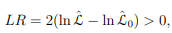

In [109]:
n_x_train = X_train.shape[0]
y_equals_1 = y_train.sum()
L_0 = (y_equals_1/n_x_train)**(y_equals_1) * ((n_x_train-y_equals_1)/n_x_train)**(n_x_train-y_equals_1)
Ln_L_0 = sp.log(L_0)
Ln_L_0

-484.929292459231

In [110]:
#Проверка со значением из statsmodels
round(model_logit.llnull, 5) == round(float(Ln_L_0), 5)

True

In [111]:
params = pd.DataFrame(model_logit.params)[1:].transpose()
F = pd.DataFrame()
for i in range(n_x_train):
    z = model_logit.params[0] + (X_train.iloc[i, 1:] * params).sum(1)[0]
    F[i] = [np.exp(z) / (1 + np.exp(z))]

F = np.array(F)
F

array([[2.58262259e-49, 9.77518097e-03, 7.61080911e-17, ...,
        4.18631463e-10, 2.26598434e-06, 3.88354990e-02]])

In [112]:
ln_L = ((np.log(F)**np.array(y_train)) * (np.log(1-F)**(1 - np.array(y_train)))).sum()
ln_L

-249.17546571079333

In [113]:
#Проверка со значением из statsmodels
round(model_logit.llf, 5) == round(float(ln_L), 5)

True

In [114]:
LR = 2 * (ln_L - Ln_L_0)
LR

471.507653496875

In [115]:
#Проверка со значением из statsmodels
round(model_logit.llr, 5) == round(float(LR), 5)

True

In [116]:
chi_2_cr = sts.chi2.isf(0.05, X_train.shape[1])
chi_2_cr

14.067140449340167

In [117]:
print('H0 отвергаем') if (LR > chi_2_cr) else print('H0 не отвергаем')

H0 отвергаем


Вывод: уравнение значимо

### Проверка качества модели

Найду псевдо-R^2 или R^2 МакФаддена
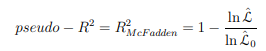

In [118]:
psevdo_R2 = 1 - ln_L / Ln_L_0
psevdo_R2

0.486161241266443

In [119]:
#Проверка со значением из statsmodels
round(model_logit.prsquared, 5) == round(float(psevdo_R2), 5)

True

Вывод: мера качества прогноза 0,486

### Проверка на тестовой выборке

Посчитаю точность модели

In [220]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_pred = model_logit.predict(X_test)
accuracy = accuracy_score(y_test, y_pred.round())
accuracy

0.9805352798053528

In [221]:
roc_auc = roc_auc_score(y_test, y_pred.round())
roc_auc

0.5395860927152318

In [222]:
f1_ = f1_score(y_test, y_pred.round())
f1_

0.14285714285714285

F1 Score с разным порогом. Чем ниже порог, тем больше компаний определяются как имеющие кредитный риск

In [223]:
best_f1 = 0
for threshold in np.linspace(0, 1, 100):
    f1_ = f1_score(y_test, (y_pred > threshold ).astype(int))
    if f1_ > best_f1:
        best_f1 = f1_
        print(f1_, threshold)

0.039999999999999994 0.0
0.19469026548672566 0.010101010101010102
0.2619047619047619 0.020202020202020204
0.2896551724137931 0.030303030303030304
0.2975206611570248 0.05050505050505051
0.33644859813084116 0.06060606060606061
0.375 0.07070707070707072
0.3956043956043956 0.08080808080808081
0.41860465116279066 0.09090909090909091
0.43902439024390244 0.10101010101010102
0.4556962025316456 0.11111111111111112
0.4736842105263158 0.12121212121212122
0.47619047619047616 0.18181818181818182
0.48387096774193555 0.19191919191919193
0.5 0.20202020202020204
0.5116279069767442 0.26262626262626265
0.5238095238095238 0.30303030303030304


In [224]:
# Оптимальный порог - 0.3
f1_ = f1_score(y_test, (y_pred > 0.3).astype(int))
f1_

0.5238095238095238

**Вывод**: точность модели высокая за счет огромного превосходства значений y=0 над y=1, поэтому модель практически всегда предлагает наиболее вероятный исход. 

ROC_AUC показал, что качество модели среднее.

f1_score показал, что модель будет средне работать с неизвестными данными и может показывать, что у компании нет кредитного риска, когда он присутствует. 

# Построение Пробит модели

In [206]:
model_probit = sm.Probit(y_train, X_train, hasconst = True).fit()

print(model_probit.summary2(title = 'Пробит модель'))

Optimization terminated successfully.
         Current function value: 0.051903
         Iterations 15
                                             Пробит модель
Model:                            Probit                       Method:                       MLE       
Dependent Variable:               Статус                       Pseudo R-squared:             0.472     
Date:                             2024-03-06 15:05             AIC:                          525.9695  
No. Observations:                 4932                         BIC:                          571.4940  
Df Model:                         6                            Log-Likelihood:               -255.98   
Df Residuals:                     4925                         LL-Null:                      -484.93   
Converged:                        1.0000                       LLR p-value:                  9.8373e-96
No. Iterations:                   15.0000                      Scale:                        1.0000    
------

X1 - Округ\
X2 - ИДО\
X3 - ИФР\
X4 - 2020, Капитал и резервы, млн. RUB\
X5 - 2020, Чистая прибыль (убыток), млн. RUB\
X6 - 2020, Оборачиваемость кредиторской задолженности, разы

Пробит модель

$Z = {b_0 + b_1X_1 + b_2X_2 + b_3X_3 + b_4X_4 + b_5X_5 + b_6X_6 + \varepsilon_i}$

$Z = -2.2265 -0.2419X_1 + 0.0137X_2 + 0.0164X_3 -0.0006X_4 -0.0016X_5 -0.0772X_6 + \varepsilon_i $

$F(Z) = \frac{1}{\sqrt{2\pi}} \int\limits_{-inf}^{Z} \exp^{-0.5*(u)^2} \, du  $

$
\sigma = 1 \\
\sigma_{b_0} = 0.2077 \\
\sigma_{b_1} = 0.0340 \\
\sigma_{b_2} = 0.0036 \\
\sigma_{b_3} = 0.0024 \\
\sigma_{b_4} = 0.0002 \\
\sigma_{b_5} = 0.0006 \\
\sigma_{b_6} = 0.0221 \\
$

### Проверка значимости регрессии в целом

H0: b1 = ... bk = 0\
H1: bi != 0, для некоторых i = 1,..k

Воспользуюсь LR-статистикой

In [207]:
LR = model_probit.llr
LR

457.8890667487634

In [208]:
chi_2_cr = sts.chi2.isf(0.05, X_train.shape[1])
chi_2_cr

14.067140449340167

In [209]:
print('H0 отвергаем') if (LR > chi_2_cr) else print('H0 не отвергаем')

H0 отвергаем


Вывод: уравнение значимо

### Проверка качества модели

In [210]:
psevdo_R_2 = model_probit.prsquared
psevdo_R_2

0.47211941396192547

Вывод: мера качества прогноза 0,472

### Проверка на тестовой выборке

In [211]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_pred = model_probit.predict(X_test)
accuracy = accuracy_score(y_test, y_pred.round())
accuracy

0.9805352798053528

In [212]:
roc_auc = roc_auc_score(y_test, y_pred.round())
roc_auc

0.5395860927152318

In [213]:
f1_ = f1_score(y_test, y_pred.round())
f1_

0.14285714285714285

F1 Score с разным порогом. Чем ниже порог, тем больше компаний определяются как имеющие кредитный риск

In [218]:
best_f1 = 0
for threshold in np.linspace(0, 1, 100):
    f1_ = f1_score(y_test, (y_pred > threshold).astype(int))
    if f1_ > best_f1:
        best_f1 = f1_
        print(f1_, threshold)

0.04045307443365696 0.0
0.18410041841004185 0.010101010101010102
0.24043715846994534 0.020202020202020204
0.271604938271605 0.030303030303030304
0.28571428571428575 0.05050505050505051
0.2903225806451613 0.06060606060606061
0.3157894736842105 0.07070707070707072
0.3564356435643564 0.08080808080808081
0.36734693877551017 0.09090909090909091
0.3956043956043956 0.10101010101010102
0.42857142857142855 0.11111111111111112
0.43589743589743585 0.13131313131313133
0.4533333333333334 0.14141414141414144
0.4545454545454546 0.17171717171717174
0.45614035087719296 0.20202020202020204
0.4583333333333333 0.22222222222222224
0.46808510638297873 0.23232323232323235
0.4782608695652174 0.24242424242424243
0.5 0.25252525252525254
0.5238095238095238 0.26262626262626265


In [217]:
# Оптимальный порог - 0.26
f1_ = f1_score(y_test, (y_pred > 0.26).astype(int))
f1_

0.5238095238095238

**Вывод**: точность модели высокая за счет огромного превосходства значений y=0 над y=1, поэтому модель практически всегда предлагает наиболее вероятный исход.

ROC_AUC показал, что качество модели среднее.

f1_score показал, что модель будет средне работать с неизвестными данными и может показывать, что у компании нет кредитного риска, когда он присутствует. 

# Вывод

Проведя исследование и построив логит и пробит модели, можно сказать, что наличие кредитного риска у компании (или ее платежеспособность) большее всего зависит от следующих параметров:\
Округ\
ИФР\
ИДО\
Капитал и резервы\
Оборачиваемость кредиторской задолженности, разы\
Чистая прибыль (убыток)

Данная модель в целом имеет среднее качество. Она хорошо предсказывает отсутствие кредитного риска, однако может ошибаться, когда он есть.